# PROJECTE IDENTIFICACIÓ DE VEU PER 4 PERSONES

### Introducció

Este proyecto tiene como objetivo diseñar e implementar un sistema de reconocimiento e identificación de voz para cuatro personas específicas. El sistema utilizará técnicas de procesamiento de señales de audio y aprendizaje automático para reconocer y distinguir las voces de las personas autorizadas.
El proceso de desarrollo constará de varias etapas clave. En primer lugar, se recopilarán muestras de voz de las cuatro personas de interés, abarcando una variedad de palabras y frases relevantes para el contexto de uso previsto. Estas muestras de voz se preprocesarán para extraer características acústicas relevantes, como tono, intensidad y frecuencia.
A continuación, se utilizarán algoritmos de aprendizaje automático para entrenar un modelo de reconocimiento de voz. Durante el entrenamiento, el modelo aprenderá a asociar las características acústicas de las muestras de voz con las identidades de las cuatro personas.
Una vez entrenado el modelo, se procederá a la fase de evaluación y ajuste fino. Se probará el sistema utilizando conjuntos de datos adicionales que no se utilizaron durante el entrenamiento, con el fin de evaluar su precisión y rendimiento en la identificación de las cuatro personas. Se realizarán ajustes en el modelo según sea necesario para mejorar su capacidad de reconocimiento y reducir posibles errores.


### Datos


Recopilaremos muestras de voz de cada uno de los usuarios a identificar mediante el modelo, 50 audios del tipo "hola, qué tal?" para cada uno de los usuarios a identificar, adicionalmente añadiremos 100 muestras de audio de usuarios diferentes a identificar. Por lo tanto contaremos con un total 300 audios.

|  id |  id_mensaje | audio    |   id persona |
|-----------|-----------|-----------|-----------|
| int    (0 -> 299)     |  int (01 -> 50)  |  str (path)  |  int (0 -> 5)



### Procedimiento

A paritr de los audios generados individualmente, los convertiremos en espectogramas para así convertir audios en imágenes. Los espectogramas serán las características de cada usuario a identificar. 

#### Imports

In [21]:
from pydub import AudioSegment
import time
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import scipy.fft
import numpy as np

#### Pasar a mp3 los audios

In [1]:
#Conversion a mp3
files = os.listdir('Audios')
for file in files:
    if file[-3:] == 'm4a':
        audio = AudioSegment.from_file('Audios\\' + file, format="m4a")
        audio.export('AudiosMp3\\' + file[:-4] + ".mp3", format="mp3")
    if file[-3:] == 'mp4':
        audio = AudioSegment.from_file('Audios\\' + file, format="mp4")
        audio.export('AudiosMp3\\' + file[:-4] + ".mp3", format="mp3")





t0 = time.time()
audio = AudioSegment.from_file("prueba.m4a", format="m4a")
print("Tiempo de carga: ", time.time() - t0)

t0 = time.time()
audio.export("archivo.mp3", format="mp3")
print("Tiempo de conversión: ", time.time() - t0)

print("Conversión completada.")

Tiempo de carga:  0.13631439208984375
Tiempo de conversión:  0.11217260360717773
Conversión completada.


#### Creación Dataset

In [4]:
filesMp3 = os.listdir('AudiosMp3')
dict = {'Id_Mensaje': [], 'Audio': [], 'Id_Persona': []}
for file in filesMp3:
    dict['Id_Mensaje'].append(int(file[:2]))
    dict['Audio'].append('AudiosMp3\\' + file)
    if file[3:-4] == 'Gerard': 
        dict['Id_Persona'].append(0)
    elif file[3:-4] == 'Albert': 
        dict['Id_Persona'].append(1)
    elif file[3:-4] == 'Adrian': 
        dict['Id_Persona'].append(2)
    elif file[3:-4] == 'Raul': 
        dict['Id_Persona'].append(3)
    else:
        dict['Id_Persona'].append(4) #Otros


df = pd.DataFrame(dict)
print(df)
    

    Id_Mensaje                         Audio  Id_Persona
0            1       AudiosMp3\01_Gerard.mp3           0
1            2       AudiosMp3\02_Gerard.mp3           0
2            3       AudiosMp3\03_Gerard.mp3           0
3            4       AudiosMp3\04_Gerard.mp3           0
4            5       AudiosMp3\05_Gerard.mp3           0
..         ...                           ...         ...
89          49  AudiosMp3\49_MadreGerard.mp3           4
90          49  AudiosMp3\49_PadreGerard.mp3           4
91          50       AudiosMp3\50_Gerard.mp3           0
92          50  AudiosMp3\50_MadreGerard.mp3           4
93          50  AudiosMp3\50_PadreGerard.mp3           4

[94 rows x 3 columns]


#### Visualizar audios

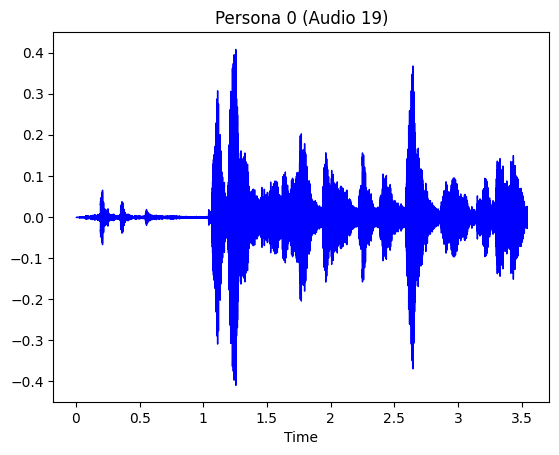

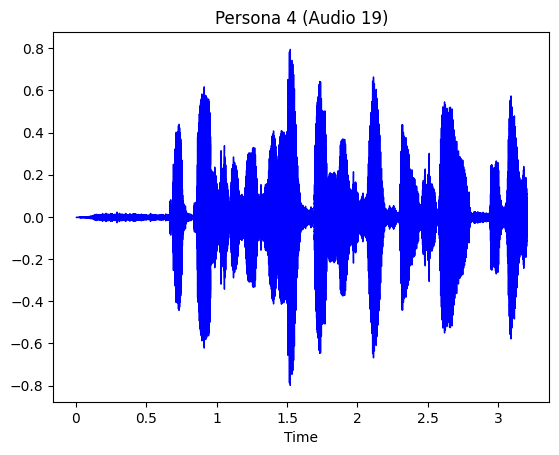

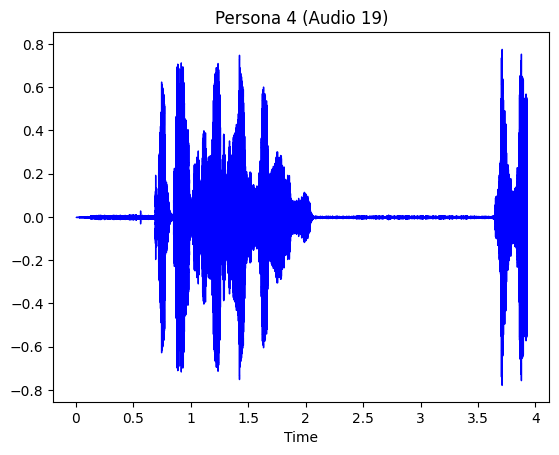

In [17]:
nAudio = 19
audios15 = df[df['Id_Mensaje'] == nAudio]

audios15 = audios15.reset_index()
for index, row in audios15.iterrows():
      # Cargar el archivo de audio MP3
    y, sr = librosa.load(row['Audio'])
    plt.figure()
    librosa.display.waveshow(y ,sr=sr, color="blue")
    plt.title('Persona ' + str(row['Id_Persona']) + ' (Audio ' + str(nAudio) + ')')
    


In [28]:
def fft_plot(y, sr, persona, nAudio):
    n = len(y)
    T = 1/sr
    yf = np.fft.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), int(n/2))
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.title("Rang de Frequencies Persona " + str(persona) + " (Audio " + str(nAudio) +")")
    plt.xlabel("Frequencia")
    plt.ylabel("Magnitud")
    return plt.show()


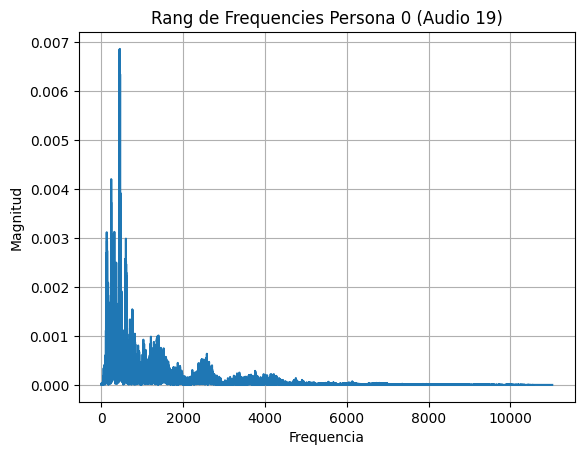

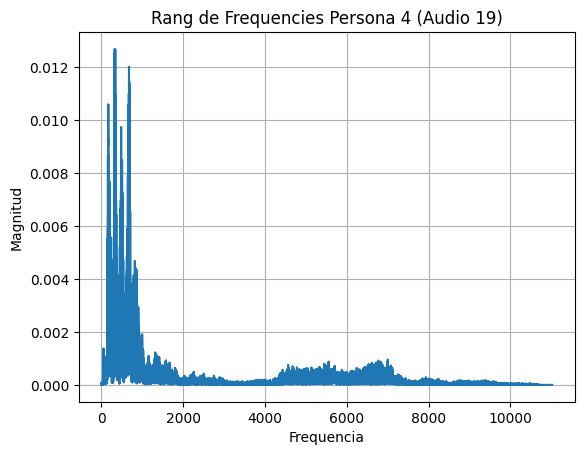

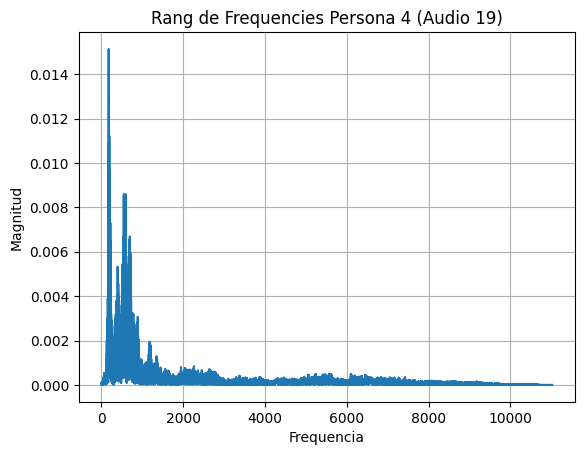

In [29]:
for index, row in audios15.iterrows():
      # Cargar el archivo de audio MP3
    y, sr = librosa.load(row['Audio'])
    fft_plot(y, sr, row['Id_Persona'], nAudio)